In [2]:
import Pkg
Pkg.add("Clustering")

   Resolving package versions...
   Installed NearestNeighbors ─ v0.4.16
   Installed Clustering ─────── v0.15.7
    Updating `C:\Users\matsz\.julia\environments\v1.10\Project.toml`
  [aaaa29a8] + Clustering v0.15.7
    Updating `C:\Users\matsz\.julia\environments\v1.10\Manifest.toml`
  [aaaa29a8] + Clustering v0.15.7
  [b8a86587] + NearestNeighbors v0.4.16
Precompiling project...
  ✓ NearestNeighbors
  ✓ Clustering
  2 dependencies successfully precompiled in 24 seconds. 395 already precompiled.


In [343]:
using Clustering
using CSV
using DataFrames
using Statistics
using StatsBase
using TimeSeries
using HiddenMarkovModels


In [273]:
acwi = Matrix(CSV.read("../sb_gbi/equity_scenarios.csv",DataFrame))

99999×50 Matrix{Float64}:
  0.183608   0.040727   0.130638  …   0.310636   0.259417   0.106576
  0.057796  -0.015669   0.01473       0.181475   0.038817   0.09112
 -0.042034   0.071062   0.211914      0.271774   0.03051    0.014144
  0.048233   0.002585   0.069304      0.161997   0.150916  -0.458586
 -0.097277   0.278737   0.249458      0.054621   0.20249    0.148626
  0.168582   0.058298   0.174671  …  -0.057467  -0.037438   0.030723
  0.096997   0.214256  -0.246285      0.148997   0.192833   0.181174
  0.254872   0.054849   0.014113      0.13077    0.066608  -0.076274
  0.263792   0.213822   0.260164      0.309639   0.022386   0.268776
  0.065249  -0.206639   0.347267      0.165357   0.180862   0.298468
  ⋮                               ⋱                        
  0.304079  -0.004624   0.041851  …  -0.008278   0.136057   0.139732
  0.261117   0.094383  -0.240846      0.037133  -0.072158  -0.037526
 -0.050816   0.211829  -0.100711      0.158417  -0.021944   0.318735
  0.370563   0.279

In [274]:
inflation = Matrix(CSV.read("../sb_gbi/inflation_scenarios.csv", DataFrame))[:,2:end]

99999×50 Matrix{Float64}:
 0.035158  0.031416  0.046096  0.018379  …  0.06628   0.09403   0.093851
 0.013222  0.0123    0.043899  0.027086     0.019199  0.021789  0.020151
 0.039912  0.040263  0.035394  0.0123       0.02551   0.0123    0.0123
 0.016048  0.0123    0.0123    0.03366      0.056582  0.0123    0.0123
 0.065174  0.052422  0.071214  0.05068      0.019615  0.058837  0.048566
 0.051986  0.035766  0.026192  0.033541  …  0.052188  0.046143  0.026802
 0.040925  0.025968  0.043467  0.024486     0.0786    0.047548  0.027347
 0.0123    0.045685  0.022954  0.0123       0.019471  0.048676  0.043244
 0.0123    0.014093  0.0123    0.0123       0.037708  0.071717  0.083529
 0.0123    0.046767  0.048754  0.071964     0.058765  0.0123    0.024597
 ⋮                                       ⋱                      
 0.05639   0.034089  0.038381  0.037493  …  0.037054  0.031733  0.02699
 0.022314  0.042175  0.031607  0.039552     0.060712  0.045391  0.080075
 0.078099  0.090769  0.052886  0.02624

In [370]:
returns = stack([acwi,inflation],dims=1)

2×99999×50 Array{Float64, 3}:
[:, :, 1] =
 0.183608  0.057796  -0.042034  0.048233  …  0.119115  -0.145221  -0.025328
 0.035158  0.013222   0.039912  0.016048     0.064728   0.027103   0.0123

[:, :, 2] =
 0.040727  -0.015669  0.071062  0.002585  …  0.095772  -0.393472  0.014187
 0.031416   0.0123    0.040263  0.0123       0.058533   0.059451  0.027505

[:, :, 3] =
 0.130638  0.01473   0.211914  0.069304  …  -0.292217  0.060243  0.174296
 0.046096  0.043899  0.035394  0.0123        0.036324  0.051567  0.0123

;;; … 

[:, :, 48] =
 0.310636  0.181475  0.271774  0.161997  …  0.084165  0.142273  0.012147
 0.06628   0.019199  0.02551   0.056582     0.0123    0.04997   0.065018

[:, :, 49] =
 0.259417  0.038817  0.03051  0.150916  …  0.118251  0.023003  0.20869
 0.09403   0.021789  0.0123   0.0123       0.035531  0.0123    0.095034

[:, :, 50] =
 0.106576  0.09112   0.014144  -0.458586  …  0.292593  0.115302  0.170179
 0.093851  0.020151  0.0123     0.0123       0.045336  0.0123    0.057752

In [373]:
period_1 = returns[:,:,5] 


2×99999 Matrix{Float64}:
 -0.178384  -0.133039  0.246116  -0.156461  …  0.118621  -0.166405  0.176704
  0.043002   0.050294  0.0123     0.0123       0.031583   0.020833  0.035917

In [374]:
period_1[:,1]

2-element Vector{Float64}:
 -0.178384
  0.043002

In [375]:
n_clusters = 12
result = kmeans(period_1,n_clusters)

KmeansResult{Matrix{Float64}, Float64, Int64}([-0.05732827407859913 0.44700307672369144 … 0.12533755957667936 -0.12933353165243305; 0.04005302178782272 0.04048623328149305 … 0.023857938108288373 0.04004329876643657], [10, 12, 6, 12, 4, 7, 8, 4, 12, 11  …  9, 3, 11, 4, 6, 6, 10, 11, 12, 3], [0.0012166480857011136, 0.00011880737145460174, 0.0007990558746499704, 0.0015055901653920067, 6.668979697685082e-5, 0.0004126892444927602, 0.0004117760927620866, 0.0010743612589757083, 0.0018978129089469511, 0.0009786252272971328  …  0.001599726713853833, 0.0001742313130751877, 0.00028886581675417744, 0.00019758033866154427, 0.0022203924597280628, 0.0011765132791824173, 0.0003696126729469118, 0.0001047887537778576, 0.0017433293441404124, 0.0001269171690280041], [9825, 1929, 13123, 13876, 2200, 10225, 7387, 12368, 6140, 4964, 10580, 7382], [9822, 1929, 13127, 13880, 2200, 10225, 7387, 12364, 6141, 4964, 10583, 7377], 96.56955500357674, 100, false)

In [376]:
counts(result)

12-element Vector{Int64}:
  9825
  1929
 13123
 13876
  2200
 10225
  7387
 12368
  6140
  4964
 10580
  7382

In [377]:
centers =result.centers

2×12 Matrix{Float64}:
 -0.0573283  0.447003   0.187174   …  -0.213155  0.125338   -0.129334
  0.040053   0.0404862  0.0400764      0.040238  0.0238579   0.0400433

In [378]:
for cluster in 1:n_clusters
    println("equity: $(centers[1,cluster]), infl: $(centers[2,cluster])")
end

equity: -0.05732827407859913, infl: 0.04005302178782272
equity: 0.44700307672369144, infl: 0.04048623328149305
equity: 0.18717380193494285, infl: 0.04007637693303768
equity: 0.0639074188760809, infl: 0.037551786023053195
equity: -0.3209512604545458, infl: 0.03979883409090907
equity: 0.25065301281173524, infl: 0.04020110014669861
equity: 0.12155981981860034, infl: 0.06843289643969122
equity: 0.006372359915884843, infl: 0.0409767646392741
equity: 0.3277884077511803, infl: 0.041093245888292655
equity: -0.21315480036261059, infl: 0.04023803041901745
equity: 0.12533755957667936, infl: 0.023857938108288373
equity: -0.12933353165243305, infl: 0.04004329876643657


In [379]:
clusters = assignments(result)

99999-element Vector{Int64}:
 10
 12
  6
 12
  4
  7
  8
  4
 12
 11
  ⋮
  3
 11
  4
  6
  6
 10
 11
 12
  3

In [380]:
cluster_means = zeros((2,n_clusters))

for cluster in 1:n_clusters
    cluster_means[:,cluster] = mean(period_1[:,clusters .== cluster],dims=2) 
end


for cluster in 1:n_clusters
    println("$(cluster_means[1,cluster]), $(cluster_means[2,cluster])")
end

-0.05728395735368964, 0.04004270798982135
0.44700307672369144, 0.04048623328149305
0.18718772696791852, 0.04007951428789038
0.06394942432977824, 0.0375427498558647
-0.3209512604545458, 0.03979883409090907
0.25065990826405793, 0.04019924479217538
0.1215678191417356, 0.06843384337349384
0.006420992399741277, 0.04098200137451366
0.3277946592833874, 0.04109597198697153
-0.21315480036261059, 0.04023803041901745
0.12537072277882774, 0.023857441776939114
-0.12930915659712794, 0.0400514490652943


In [381]:
probs = counts(result)/sum(counts(result))

12-element Vector{Float64}:
 0.0982509825098251
 0.01929019290192902
 0.13123131231312313
 0.13876138761387613
 0.022000220002200022
 0.10225102251022511
 0.07387073870738707
 0.12368123681236812
 0.06140061400614006
 0.04964049640496405
 0.10580105801058011
 0.07382073820738208

In [382]:
scenario_period1 = DataFrame(Equity=cluster_means[1,:].*100,EDO=cluster_means[2,:].*100,Probs=probs*100)

Row,Equity,EDO,Probs
,Float64,Float64,Float64
1,-5.7284,4.00427,9.8251
2,44.7003,4.04862,1.92902
3,18.7188,4.00795,13.1231
4,6.39494,3.75427,13.8761
5,-32.0951,3.97988,2.20002
6,25.066,4.01992,10.2251
7,12.1568,6.84338,7.38707
8,0.642099,4.0982,12.3681
9,32.7795,4.1096,6.14006


In [384]:
function cluster(data, n_clusters)
    dt = fit(ZScoreTransform, data, dims=2)
    standarized = StatsBase.transform(dt,data)

    clusters = kmeans(standarized,n_clusters)

    destandarised = StatsBase.reconstruct(dt, clusters.centers)

    probs = counts(clusters)/sum(counts(clusters))

    return destandarised, probs
end

grid, probs = cluster(period_1, 6)
display(DataFrame(grid, :auto))
display(probs)

Row,x1,x2,x3,x4,x5,x6
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0881188,0.274149,0.0731374,-0.0855874,0.203957,-0.154778
2,0.0467501,0.0265028,0.0176953,0.0707203,0.074317,0.0272823


6-element Vector{Float64}:
 0.21822218222182221
 0.16828168281682818
 0.22751227512275124
 0.10967109671096711
 0.13432134321343214
 0.14199141991419914

In [396]:
function cluster_moments(data, n_clusters)
    dt = fit(ZScoreTransform, data, dims=2)
    standarized = StatsBase.transform(dt,data)

    clusters = kmeans(standarized,n_clusters)
    c = assignments(clusters)

    cluster_means = zeros(2,n_clusters)
    cluster_cov = zeros(2,2,n_clusters)

    for cluster in 1:n_clusters
        cluster_means[:,cluster] = mean(period_1[:,c .== cluster],dims=2) 
        cluster_cov[:,:,cluster] = cov(period_1[:,c .== cluster],dims=2) 
    end

    return  cluster_means, cluster_cov 
end

means, c_cov = cluster_moments(period_1,8)


([0.061849986063225136 0.25879161298756354 … 0.14891253276174887 0.10060511554241024; 0.01784775496527842 0.01977018817128425 … 0.04504365060391777 0.0817931711668736], [0.003351344641371066 -7.54829588375704e-6; -7.54829588375704e-6 4.332358302289987e-5;;; 0.005574976276326292 7.156499947414419e-5; 7.156499947414419e-5 6.547455084685891e-5;;; 0.0026083531466683093 6.284980570348746e-5; 6.284980570348746e-5 8.51485627465547e-5;;; 0.006834265264966041 0.00023219709841027438; 0.00023219709841027438 0.00020367434168471754;;; 0.005933699012180822 -9.788126245616605e-5; -9.788126245616605e-5 0.00015100253872472573;;; 0.006574102536237531 -0.00010081238088570607; -0.00010081238088570607 9.677173001961664e-5;;; 0.0022453903143033927 -2.5545723893703288e-5; -2.5545723893703288e-5 7.469930565266753e-5;;; 0.006630025995535407 6.004990547869435e-5; 6.004990547869435e-5 0.00018829017949932507])

In [387]:
function guess_init(n_scenarios)
    regimes_probs = rand(1:100,n_scenarios)
    return regimes_probs/sum(regimes_probs)
end

function guess_tmatrix(n_scenarios)
    regimes_probs = rand(1:100,n_scenarios,n_scenarios)
    return regimes_probs ./ sum(regimes_probs,dims=2)
end
function guess_distribution()
    corr = Matrix(1.0I,2,2)
    sigma = [rand(Uniform(0,0.25)),rand(Uniform(0,0.035))]
    means = [rand(Uniform(-0.5,0.5)),rand(Uniform(-0.01,0.12))]
    cov = cor2cov(corr,sigma)
    return MvNormal(means,cov)
end

using LinearAlgebra, Distributions

In [393]:
n_clusters = 8
init_guess = guess_init(n_clusters)
guess_matrix = guess_tmatrix(n_clusters)
guess_dist = [guess_distribution() for s in 1:n_clusters]
hmm_guess = HMM(init_guess, guess_matrix, guess_dist);
println(hmm_guess)
hmm_est_concat, _ = baum_welch(hmm_guess, eachcol(period_1));
println(hmm_est_concat)

Hidden Markov Model with:
 - initialization: [0.0741687979539642, 0.14578005115089515, 0.11508951406649616, 0.16112531969309463, 0.10741687979539642, 0.015345268542199489, 0.21483375959079284, 0.16624040920716113]
 - transition matrix: [0.15803814713896458 0.23160762942779292 0.03814713896457766 0.06267029972752043 0.21798365122615804 0.2724795640326976 0.013623978201634877 0.005449591280653951; 0.15327102803738318 0.03551401869158879 0.17196261682242991 0.11775700934579439 0.11401869158878504 0.11962616822429907 0.10093457943925234 0.18691588785046728; 0.04941860465116279 0.0755813953488372 0.10755813953488372 0.13662790697674418 0.22674418604651161 0.03197674418604651 0.18604651162790697 0.18604651162790697; 0.06756756756756757 0.04594594594594595 0.17027027027027028 0.1 0.23513513513513515 0.1891891891891892 0.14054054054054055 0.051351351351351354; 0.16743119266055045 0.12155963302752294 0.22018348623853212 0.11697247706422019 0.07110091743119266 0.06422018348623854 0.1146788990825

In [397]:
n_clusters = 8
guess_dist = [MvNormal(means[:,s],c_cov[:,:,s]) for s in 1:n_clusters]
init_guess = guess_init(n_clusters)
guess_matrix = guess_tmatrix(n_clusters)
hmm_guess = HMM(init_guess, guess_matrix, guess_dist);
println(hmm_guess)
hmm_est_concat, _ = baum_welch(hmm_guess, eachcol(period_1));
println(hmm_est_concat)

Hidden Markov Model with:
 - initialization: [0.2692307692307692, 0.03021978021978022, 0.019230769230769232, 0.18681318681318682, 0.09065934065934066, 0.18956043956043955, 0.07417582417582418, 0.1401098901098901]
 - transition matrix: [0.16558441558441558 0.21428571428571427 0.07792207792207792 0.006493506493506494 0.275974025974026 0.12987012987012986 0.00974025974025974 0.12012987012987013; 0.17737003058103976 0.0030581039755351682 0.039755351681957186 0.16819571865443425 0.10397553516819572 0.2874617737003058 0.19877675840978593 0.021406727828746176; 0.10421836228287841 0.19602977667493796 0.23325062034739455 0.052109181141439205 0.004962779156327543 0.23325062034739455 0.08188585607940446 0.09429280397022333; 0.03015075376884422 0.07788944723618091 0.010050251256281407 0.24120603015075376 0.02512562814070352 0.2185929648241206 0.22613065326633167 0.1708542713567839; 0.1641509433962264 0.17358490566037735 0.1792452830188679 0.11886792452830189 0.1811320754716981 0.10754716981132076 

In [440]:
mean.(obs_distributions(hmm_est_concat))

8-element Vector{Vector{Float64}}:
 [0.07806797401757472, 0.012300000000000038]
 [0.1437850485857163, 0.02103689432358122]
 [0.01349388996162989, 0.045004093950047494]
 [-0.1579887652386759, 0.05871467918248789]
 [0.2276774835061208, 0.05270108003348968]
 [-0.06094493109075112, 0.026641483418099465]
 [0.15121161997003807, 0.041062437454147796]
 [0.10767565859329635, 0.07103154789506468]

In [417]:
period_1[:,1:1000]

2×1000 Matrix{Float64}:
 -0.178384  -0.133039  0.246116  -0.156461  …  0.273577  0.150923  0.06904
  0.043002   0.050294  0.0123     0.0123       0.060006  0.039202  0.066672

In [445]:
include("hmm_lattice.jl")

lattice = hmm_lattice(period_1,4)

display(lattice.likehood)
display(lattice.nodes)
display(lattice.probabilities)

790830.8119075593

4-element Vector{Vector{Float64}}:
 [0.10291589530401819, 0.02649547137571558]
 [0.011092753558372836, 0.04697261136512067]
 [0.07806797401757319, 0.012300000000005218]
 [0.12829377345248888, 0.06261673024773194]

4×4 Matrix{Float64}:
 0.23068   0.301417  0.185251  0.282652
 0.231413  0.292543  0.183044  0.292999
 0.225791  0.308259  0.188561  0.277389
 0.230035  0.29958   0.186337  0.284047

In [459]:
likehoods = [hmm_lattice(period_1,n_nodes).likehood for n_nodes in 3:1:15]

13-element Vector{Float64}:
 780021.2884018429
 784007.5190343491
 784611.504055671
 786383.87115671
 787096.2229044905
 789298.0317348029
 786000.9613421836
 788918.7198885442
 787176.2997644356
 788814.6449263451
 788599.8587236633
 781403.9617612261
 786153.6655119761

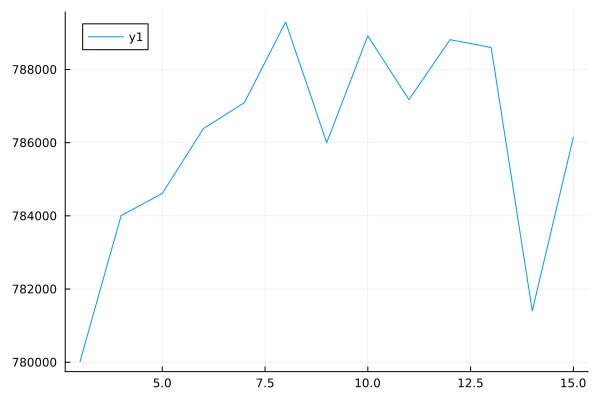

In [460]:
using Plots

plot(3:1:15,likehoods)

In [462]:
lattice = hmm_lattice(period_1,9)
display(lattice.likehood)
display(lattice.nodes)
display(lattice.probabilities)

784696.397763376

9-element Vector{Vector{Float64}}:
 [-0.14104892849355968, 0.06377811218974819]
 [0.2132990985867854, 0.025855683275203722]
 [0.23789166078302898, 0.057492274127328456]
 [-0.1463210413685543, 0.03337515759590863]
 [0.0034739078361847027, 0.047194630630251096]
 [0.07806797401757355, 0.01229999999999757]
 [0.10662118380173775, 0.07082477404745038]
 [0.13779696286722412, 0.041429192150814295]
 [0.041245442339036105, 0.020531700393047015]

9×9 Matrix{Float64}:
 0.0811832  0.076671   0.0978279  …  0.146813   0.173471  0.0876006
 0.0801506  0.0908242  0.103697      0.116378   0.18363   0.0855418
 0.0882891  0.0800216  0.119082      0.106197   0.158315  0.0883915
 0.0670381  0.0819246  0.077407      0.168627   0.192364  0.0895377
 0.103613   0.0779243  0.135673      0.0508031  0.178305  0.0905125
 0.0863603  0.0870281  0.103948   …  0.115909   0.169409  0.0834515
 0.0706179  0.0842116  0.0828146     0.155141   0.17266   0.0894441
 0.0748256  0.0898535  0.0859107     0.153826   0.160695  0.0893302
 0.0830919  0.0756803  0.0929363     0.143924   0.162905  0.0885643

In [463]:
lattice = hmm_lattice(period_1,7)
display(lattice.likehood)
display(lattice.nodes)
display(lattice.probabilities)

782138.298323821

7-element Vector{Vector{Float64}}:
 [0.08491041910258486, 0.042598894435112486]
 [0.07806797401757452, 0.012299999999995082]
 [0.14591840909330522, 0.022061242080924196]
 [-0.06630210742114963, 0.02640244846254957]
 [0.20062373397231922, 0.052080247879892065]
 [-0.10945239302530425, 0.054793000807575515]
 [0.11363214518535793, 0.07464978539082257]

7×7 Matrix{Float64}:
 0.180569  0.18818   0.134387  0.0796123  0.165836  0.128721  0.122695
 0.20318   0.188561  0.119335  0.075064   0.171788  0.128773  0.113299
 0.197883  0.181194  0.120262  0.0826162  0.171536  0.124696  0.121812
 0.226951  0.189244  0.105151  0.0759345  0.154819  0.11155   0.13635
 0.22716   0.183199  0.108116  0.0787409  0.160513  0.116182  0.126089
 0.229057  0.177196  0.11344   0.07328    0.154511  0.115906  0.13661
 0.188798  0.189658  0.124283  0.0806791  0.173646  0.121768  0.121168

In [430]:
module Temp
struct Lattice
    likehood    
    Lattice(likehood) = new(likehood)
end
end

Temp.Lattice(786135.86).likehood

786135.86

In [428]:
struct Foo
    bar
    baz::Int
    qux::Float64
end

Foo("Hello, world.", 23, 1.5)

Foo("Hello, world.", 23, 1.5)

In [317]:
source_data = TimeArray(CSV.File("assets_data_03.24.csv", delim=';', dateformat=Dict("Date" => "dd.mm.yyyy"), decimal=','),timestamp=:Date)
returns = percentchange(source_data, :log)


615×5 TimeArray{Union{Missing, Float64}, 2, Date, Matrix{Union{Missing, Float64}}} 1973-01-31 to 2024-03-31
┌────────────┬────────────┬─────────────┬──────────────┬──────────────┬─────────
│            │ ACWI_Net   │ USDPLN      │ ACWI_Net_PLN │ CPI_USA      │ CPI_PL ⋯
├────────────┼────────────┼─────────────┼──────────────┼──────────────┼─────────
│ 1973-01-31 │    missing │     missing │      missing │   0.00235067 │     mi ⋯
│ 1973-02-28 │    missing │     missing │      missing │   0.00701905 │     mi ⋯
│ 1973-03-31 │    missing │     missing │      missing │   0.00927727 │     mi ⋯
│ 1973-04-30 │    missing │     missing │      missing │   0.00690598 │     mi ⋯
│ 1973-05-31 │    missing │     missing │      missing │   0.00685862 │     mi ⋯
│ 1973-06-30 │    missing │     missing │      missing │    0.0068119 │     mi ⋯
│ 1973-07-31 │    missing │     missing │      missing │   0.00225501 │     mi ⋯
│ 1973-08-31 │    missing │     missing │      missing │    0.0179014 │     mi ⋯
│

In [318]:
returns_yearly = percentchange(collapse(source_data,year, last))

52×5 TimeArray{Union{Missing, Float64}, 2, Date, Matrix{Union{Missing, Float64}}} 1973-12-31 to 2024-03-31
┌────────────┬────────────┬────────────┬──────────────┬────────────┬────────────
│            │ ACWI_Net   │ USDPLN     │ ACWI_Net_PLN │ CPI_USA    │ CPI_PLN   ⋯
├────────────┼────────────┼────────────┼──────────────┼────────────┼────────────
│ 1973-12-31 │    missing │    missing │      missing │  0.0870605 │     missi ⋯
│ 1974-12-31 │    missing │    missing │      missing │   0.123377 │     missi ⋯
│ 1975-12-31 │    missing │    missing │      missing │  0.0693605 │     missi ⋯
│ 1976-12-31 │    missing │    missing │      missing │  0.0486505 │     missi ⋯
│ 1977-12-31 │    missing │    missing │      missing │  0.0670123 │     missi ⋯
│ 1978-12-31 │    missing │    missing │      missing │   0.090177 │     missi ⋯
│ 1979-12-31 │    missing │    missing │      missing │   0.132939 │     missi ⋯
│ 1980-12-31 │    missing │    missing │      missing │   0.125161 │     missi ⋯
│ 

In [319]:
val = eachcol(values(from(returns_yearly,Date(2003,02,01))))

[percentile(a,[5, 25, 50, 75, 95]) for a in val]

5-element Vector{Vector{Float64}}:
 [-0.1791646535637412, 0.050866825980199704, 0.13951720841975523, 0.21889844750843207, 0.3361762844747671]
 [-0.16789023904324368, -0.08309423208140795, 0.01405036560292702, 0.08138626868521559, 0.17291389833351883]
 [-0.11150993397204947, 0.03390535467137583, 0.09733228505343647, 0.19875932356089762, 0.30291930341482903]
 [0.007308352896474506, 0.015616012312351955, 0.02091860212971578, 0.03182293580839392, 0.06335757465785029]
 [-0.005813596241253867, 0.00972740828317448, 0.02302606076369674, 0.03842710017413295, 0.08567916010546725]

In [320]:
acwi_cpipln = identity.(values(from(returns[:ACWI_Net_PLN,:CPI_PLN],Date(2003,02,01))))

254×2 Matrix{Float64}:
  0.0051036     0.000927653
  0.0430686     0.00277912
  0.0118412     0.0018489
  0.0300994     0.0
  0.0670022    -0.000924682
  0.0132941    -0.00370334
  0.0495565    -0.00371711
  0.000195397   0.0046439
  0.0782452     0.00554541
 -0.0161735     0.00276122
  ⋮            
  0.0208096    -0.00221661
  0.000986609   0.0
  0.0154043    -0.00389282
 -0.066645      0.00278164
  0.0356998     0.00719694
  0.0310713     0.00110186
  0.0233511     0.00384933
  0.0394925     0.00274048
  0.0298368     0.00218699

In [321]:
transpose(acwi_cpipln)

2×254 transpose(::Matrix{Float64}) with eltype Float64:
 0.0051036    0.0430686   0.0118412  …  0.0233511   0.0394925   0.0298368
 0.000927653  0.00277912  0.0018489     0.00384933  0.00274048  0.00218699

In [322]:
state, probs = cluster(transpose(acwi_cpipln),4)
display(state*12)
display(probs)


2×4 Matrix{Float64}:
 0.506915   -0.741961   -0.0241622  -0.0317024
 0.0235401   0.0357811   0.0073365   0.143168

4-element Vector{Float64}:
 0.33858267716535434
 0.09055118110236221
 0.44881889763779526
 0.1220472440944882

In [323]:
acwi_cpiusd = identity.(values(from(returns[:ACWI_Net,:CPI_USA],Date(1988,01,01))))

state, probs = cluster(transpose(acwi_cpiusd),3)

display(state)
display(probs)

2×3 Matrix{Float64}:
 0.0208741    0.0300136    -0.0488946
 0.00509747  -0.000185102   0.00239701

3-element Vector{Float64}:
 0.34022988505747126
 0.39770114942528734
 0.2620689655172414